In [1]:
import pandas as pd
import numpy as np
import json
import keras
import random
from keras.layers import Dense, LSTM, Dropout, Masking
from keras.models import Sequential, load_model
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import os

Using TensorFlow backend.


In [2]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)

for elem in range(len(data_lines)):
    for arr in range(len(data_lines[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_lines[elem][arr][f])
        data_lines[elem][arr] = tmp

In [3]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)

for elem in range(len(data_circles)):
    for arr in range(len(data_circles[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_circles[elem][arr][f])
        data_circles[elem][arr] = tmp
        

In [4]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)
    

def generator(data, labels):
    assert len(data) == len(labels)
    while True:
        for elem in range(len(data)):
            #word_array = []
            #for arr in range(len(data[elem])):
            #    tmp = []
            #    for f in range(7):
            #        tmp.append(data[elem][arr][f])
            #    word_array.append(tmp)
            yield np.array(data[elem]), np.array(labels[elem])

g_lines = generator(data_lines, [1] * len(data_lines))

In [5]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)
    
g_circles = generator(data_circles, [0] * len(data_circles))

In [6]:
file_recog = 'Dario_pad.json'
file_path = '../dati/scrittura_di_computer/pad/'
labelled_data_d, labelled_data_g = [], []

for file in os.listdir(file_path):
    if file_recog == file: continue
    with open(os.path.join(file_path, file), 'r') as f:
        data_g = json.load(f)
    for i in range(len(data_g)):
        labelled_data_g.append((data_g[i], 0))
        
        
with open(os.path.join(file_path, file_recog), 'r') as f:
    data_r = json.load(f)
for i in range(len(data_r)):
    labelled_data_d.append((data_r[i], 1))
    
def xy_data(labelled_data):
    x_data, y_labels = [], []
    for i in labelled_data:
        x_data.append(i[0])
        y_labels.append(i[1])
        
    return np.array(x_data), np.array(y_labels)

labelled_data_dg = labelled_data_d * 8 + labelled_data_g  
random.shuffle(labelled_data_dg)

data_dg, label_dg = xy_data(labelled_data_dg)


In [7]:
def create_model():
    model = Sequential()
    model.add(Masking(mask_value=0.0))
    model.add(LSTM(input_shape=(1000, 7), units=64, activation="sigmoid", return_sequences=True, recurrent_activation="hard_sigmoid"))
    model.add(LSTM(units=128, activation="sigmoid", return_sequences=False, recurrent_activation="hard_sigmoid"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [8]:
#neural_network = KerasClassifier(build_fn=create_model, 
#                                 epochs=4,
#                                 steps_per_epoch=140,
#                                 validation_split=0.2,
#                                 validation_steps=36,
#                                 verbose=1)

In [9]:
#plot_model(model_dario, show_shapes=True, to_file='lstm_dropout_model.png')

In [10]:
#hist = model_dario.fit_generator(g_dario_impostors, epochs=5, steps_per_epoch=42)


In [11]:
model_dario = create_model()
cb = keras.callbacks.TensorBoard(log_dir='/usr/Graph', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

hist = model_dario.fit(x = data_dg, y = label_dg, epochs=150, batch_size=32, callbacks=[cb],validation_split=0.33)

#out = cross_val_score(neural_network, data_dg, label_dg, cv=10,)

Train on 413 samples, validate on 204 samples
Epoch 1/150
413/413 [==============================] - 25s 61ms/step - loss: 0.7456 - acc: 0.4746 - val_loss: 0.6979 - val_acc: 0.4951
Epoch 2/150
413/413 [==============================] - 25s 61ms/step - loss: 0.7082 - acc: 0.5085 - val_loss: 0.6803 - val_acc: 0.7059
Epoch 3/150
413/413 [==============================] - 25s 61ms/step - loss: 0.7166 - acc: 0.4867 - val_loss: 0.6783 - val_acc: 0.4951
Epoch 4/150
413/413 [==============================] - 25s 60ms/step - loss: 0.6792 - acc: 0.5884 - val_loss: 0.6573 - val_acc: 0.7843
Epoch 5/150
413/413 [==============================] - 24s 59ms/step - loss: 0.6757 - acc: 0.5811 - val_loss: 0.6425 - val_acc: 0.6078
Epoch 6/150
413/413 [==============================] - 25s 60ms/step - loss: 0.6378 - acc: 0.6513 - val_loss: 0.5858 - val_acc: 0.8235
Epoch 7/150
413/413 [==============================] - 25s 59ms/step - loss: 0.5729 - acc: 0.7119 - val_loss: 0.5009 - val_acc: 0.8480
Epoch 8/1

Epoch 61/150
413/413 [==============================] - 24s 59ms/step - loss: 0.2314 - acc: 0.9637 - val_loss: 0.0103 - val_acc: 0.9951
Epoch 62/150
413/413 [==============================] - 25s 59ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0123 - val_acc: 0.9951
Epoch 63/150
413/413 [==============================] - 24s 59ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 64/150
413/413 [==============================] - 25s 59ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0248 - val_acc: 0.9951
Epoch 65/150
413/413 [==============================] - 24s 59ms/step - loss: 7.0400e-04 - acc: 1.0000 - val_loss: 0.0311 - val_acc: 0.9951
Epoch 66/150
413/413 [==============================] - 25s 59ms/step - loss: 5.3231e-04 - acc: 1.0000 - val_loss: 0.0484 - val_acc: 0.9902
Epoch 67/150
413/413 [==============================] - 24s 59ms/step - loss: 0.5124 - acc: 0.9274 - val_loss: 0.0199 - val_acc: 0.9951
Epoch 68/150
413/413 [==================

413/413 [==============================] - 24s 59ms/step - loss: 1.9567e-04 - acc: 1.0000 - val_loss: 0.0235 - val_acc: 0.9951
Epoch 121/150
413/413 [==============================] - 24s 59ms/step - loss: 2.4451e-04 - acc: 1.0000 - val_loss: 0.0233 - val_acc: 0.9951
Epoch 122/150
413/413 [==============================] - 25s 59ms/step - loss: 2.7879e-04 - acc: 1.0000 - val_loss: 0.0290 - val_acc: 0.9951
Epoch 123/150
413/413 [==============================] - 24s 59ms/step - loss: 1.9642e-04 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 0.9951
Epoch 124/150
413/413 [==============================] - 24s 59ms/step - loss: 1.5192e-04 - acc: 1.0000 - val_loss: 0.0220 - val_acc: 0.9951
Epoch 125/150
413/413 [==============================] - 24s 59ms/step - loss: 5.7828e-05 - acc: 1.0000 - val_loss: 0.0195 - val_acc: 0.9951
Epoch 126/150
413/413 [==============================] - 25s 59ms/step - loss: 4.3020e-05 - acc: 1.0000 - val_loss: 0.0149 - val_acc: 0.9951
Epoch 127/150
413/413 [====

In [12]:
#out
#!git config --global user.email "antoniomusolino007@gmail.com"
!git add ../.
!git commit -m 'aggiunto nuovo codice'
!git push 
#print(out)
#out.mean()

[master f6fef5b] aggiunto nuovo codice
 1 file changed, 326 insertions(+), 142 deletions(-)
Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), 

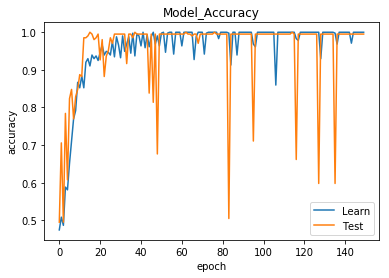

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

def gen_mean (curve):
    mean = [0]* len(curve)
    mean[0] = curve[0]
    for i in range(1,len(curve)):
        mean[i] = ((mean[i-1] )*i + out[i])/(i+1)
    return mean
from scipy.ndimage.filters import gaussian_filter1d


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learn', 'Test'], loc='lower right')
plt.savefig('./150_epoch_accuracy_new_data')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./model_accuracy_40Epoch_scaled',quality=100,)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('./model_loss_40Epoch_scaled')

In [22]:
model_dario.save("model_dario_good_performance.h5")
del model_dario

In [23]:
model_dario_reloaded = load_model("model_dario.h5")


In [38]:
out_dario_reloaded = model_dario_reloaded.predict(np.reshape(data_dg[100],(1,1000,7)))

out_dario_reloaded

array([[0.99999225]], dtype=float32)